In [1]:
import sqlite3
import matplotlib.pyplot as plt 
import pandas as pd           # Data Manipulation
import numpy as np            # Linear Algebra
import seaborn as sns         # Data Visualization
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

In [2]:
# Connect to database
conn = sqlite3.connect('example.db')

## Data Overview

In [3]:
# Use pandas to query data
sheet_name = "small countries are beautiful"
sql = "SELECT * FROM `small countries are beautiful`"
# sql += " WHERE `happy planet index`>2"
df = pd.read_sql_query(sql, conn)
df = df.drop(columns="index")
cols = df.columns
# cols

In [4]:
df

,indicator,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index,health expenditure,education expenditure
0,Albania,2900000,34.2,11840.2,1248266.29680999,27398,104.8706934,57616,3.1,1122910,27.94,20.2,4.639548302,0.785,774,-
1,Armenia,3000000,25.8,8621,914796.298266142,28203,102.9311556,191199,10.6,937299,23.70,25.7,4.287736416,0.755,883,89.7707766002676
2,Bahamas,400000,9,24555.2,899100.899100899,10010,39.4966034,59306,16.3,40095,9.35,-,-,0.807,1699,-
3,Bahrain,1300000,66.9,50704.1,88026315.7894737,760,1935.906615,704137,54.7,55964,4.00,-,6.227320671,0.846,2453,616.454863116381
4,Barbados,300000,4.8,17100.2,11162790.6976744,430,664.4627907,34475,11.3,98464,26.16,-,-,0.8,1234,1013.01418092476
5,Belize,400000,3.1,8219.9,135929.141454003,22806,16.42617273,53860,15,59884,14.29,33.8,-,0.708,524,313.669461151266
6,Bhutan,800000,6.5,8227.4,169297.286034276,38394,21.18765905,51106,6.7,44190,5.40,28.6,-,0.612,287,147.861730303017
7,Bosnia and Herzegovina,3900000,42.2,10957.5,824428.077441538,51187,68.49642578,34803,0.6,1650772,30.23,25.3,5.089902401,0.768,1102,227.594351757972
8,Botswana,2200000,36.7,17041.6,64757.4682829566,566730,4.043655709,160644,7.2,58346,2.51,16.6,3.504881144,0.717,970,-
9,Brunei Darussalam,400000,32.5,76884,6172839.50617284,5265,81.34667932,102733,49.3,46237,9.85,-,-,0.853,2083,1392.60221626817


# Data Transform

## Data format

In [5]:
# Transform df(Dataframe) to numeric dtype

for i in cols[1:]:
    df[i]=pd.to_numeric(df[i],downcast='float', errors='coerce')
# #     df[cols[i]].astype('float64',errors='ignore')
for i,e in enumerate(df.columns):
    print(e, '\t\t\t',df[e].dtypes)
    
# float_list = list(range(len(cols)))
# for i in int_list:
#     float_list.remove(i)
# float_list.remove(0)
# for i in float_list:
#     a = pd.to_numeric(df[cols[i]],downcast='float', errors='coerce')
#     df[cols[i]]=a
# print(df.dtypes)
# print(df.head())
# df.describe()

indicator 			 object
population 			 float32
GDP  			 float32
GDP .1 			 float32
GDP per km2  			 float32
land area (sq km) 			 float32
population density  			 float32
total foreign-born
population  			 float32
% foreign-born population 			 float32
population living abroad (diaspora) 			 float32
population living abroad  			 float32
happy planet index 			 float32
world happiness report score 			 float32
human development index 			 float32
health expenditure  			 float32
education expenditure  			 float32


## Data Normalization

In [6]:
# Normalize the data except a few cols
# to_norm = df[cols[1:-2]]
# df_norm = ((to_norm - to_norm.min())/(to_norm.max()-to_norm.min()))*20

df_norm = df.copy()
for i in cols[1:-2]:
#     print(i)
    to_norm = df_norm[i]
    df_norm[i] = ((to_norm - to_norm.min())/(to_norm.max()-to_norm.min()))*20


df_norm.head()

,indicator,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index,health expenditure,education expenditure
0,Albania,11.666666,2.066869,1.761830,0.282461,0.348944,1.064062,0.385663,0.814111,13.593628,11.330876,4.444445,5.817919,14.640982,774.0,NaN
1,Armenia,12.083334,1.556231,1.254900,0.206691,0.359309,1.044004,1.318589,2.849389,11.340969,9.594595,7.936509,4.059015,13.590193,883.0,89.770775
2,Bahamas,1.250000,0.534954,3.764071,0.203125,0.125053,0.387986,0.397466,4.396200,0.452095,3.718264,NaN,NaN,15.411558,1699.0,NaN
3,Bahrain,5.000000,4.054711,7.881759,20.000000,0.005949,20.000000,4.900881,14.816824,0.644688,1.527436,NaN,13.756083,16.777584,2453.0,616.454834
4,Barbados,0.833333,0.279635,2.590126,2.535220,0.001700,6.851170,0.224050,3.039348,1.160488,10.601965,NaN,NaN,15.166376,1234.0,1013.014160


## Data Visualization for overview

In [7]:
df_norm.describe()

,population,GDP,GDP .1,GDP per km2,land area (sq km),population density,total foreign-born population,% foreign-born population,population living abroad (diaspora),population living abroad,happy planet index,world happiness report score,human development index,health expenditure,education expenditure
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,66.000000,66.000000,66.000000,66.000000,40.000000,36.000000,65.000000,64.000000,25.000000
mean,7.388059,2.569523,3.212241,1.118112,1.449889,1.914689,1.742859,3.237531,3.214587,5.492952,7.480952,10.905005,12.465579,1243.468750,884.849548
std,6.524922,4.309532,3.795448,3.024230,3.368049,3.574140,3.648781,4.226396,4.172445,4.449630,4.989060,5.168604,4.594929,1298.889282,1155.824097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,2.562006
25%,1.458333,0.197568,0.859129,0.044265,0.055142,0.257170,0.088311,0.658073,0.646387,1.686118,3.031746,6.913028,9.106829,329.250000,175.205673
50%,5.000000,1.106383,1.761830,0.183530,0.289817,0.741974,0.441091,1.858887,1.396675,4.748157,6.857143,12.190005,13.099824,862.000000,381.442993
75%,12.083334,2.440729,4.094885,0.615725,0.843176,1.922313,1.325613,3.799186,4.148330,7.471335,10.873017,13.813103,15.411558,1666.750000,1013.014160
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,6382.000000,4762.326660


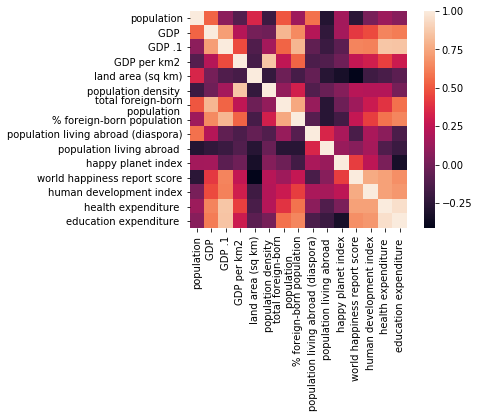

In [8]:
# Subset the data to key cols
# Visualize correlation in a heapmap
# cols_name = [cols[i] for i in [1,2,5,7,9,11,13]]
cols_name = cols
df_corr = df_norm[cols_name]
cor = df_corr[1:].corr()
sns.heatmap(cor, square = True)

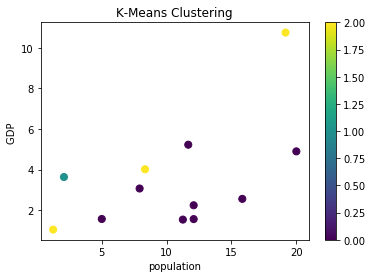

In [9]:
#K means Clustering
# cols_name = [cols[i] for i in [2,3,6,8,11]]
# df_corr = df_norm[cols_name]

df_kmeans = df_norm.dropna(axis='index', how='any')

# print(df_kmeans.head())


def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)


# print(np.any(np.isnan(df_kmeans)))
# print(np.all(np.isfinite(df_kmeans)))

sample = df_kmeans[df_kmeans.columns[1:]]
# print(sample)
clust_labels, cent = doKmeans(sample, 3)
kmeans = pd.DataFrame(clust_labels)
sample.insert((sample.shape[1]),'kmeans',kmeans)

fig = plt.figure()
ax = fig.add_subplot(111)
axis1 = 'population'
axis2 = 'GDP '
scatter = ax.scatter(sample[axis1],sample[axis2],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel(axis1)
ax.set_ylabel(axis2)
plt.colorbar(scatter)


In [10]:
#choropleth-maps
#Ref: https://plot.ly/python/choropleth-maps/
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

axis = 'GDP .1'
# axis = 'population'

data = dict(type = 'choropleth', 
           locations = df_norm['indicator'],
           locationmode = 'country names',
           z = df_norm[axis], 
           text = df_norm['indicator'],
           colorbar = {'title':axis},
           marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) )
           )

scope = 'globe'
# scope = 'asia'

layout = dict(title = axis2, 
             geo = dict(scope=scope,
                        showframe = False, 
                       projection = {'type': 'Mercator'}))

choromap3 = go.Figure(data = [data], layout=layout)

iplot(choromap3)